# Preamble

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import read_stats, assign_channels, plot_kde
import scipy
from itertools import combinations, product
from tqdm import tqdm
import scipy.stats
import scipy.cluster.hierarchy as hierarchy
import pickle
import statannot
plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams['figure.dpi'] = 500
rng = np.random.default_rng()

In [58]:
dist_cutoff=30

samples=['1L','1R','2L','2R']
conditions={'1L':'PBS','1R':'LPS','2L':'PBS','2R':'LPS'}
df_lst=[]
for sample in samples:
    apc_df=read_stats(f'..\\240222_ccr7ko\\{sample}_dc_Statistics')
    apc_df['sample']=sample
    apc_df['condition']=conditions[sample]
    positions=np.array(apc_df[['Position_X','Position_Y','Position_Z']])
    distances=scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(positions))
    apc_df['n_proximal_apcs']=np.sum(np.int8(distances<dist_cutoff),axis=0)-1
    df_lst.append(apc_df)


d:\WongLabUsers\Eric\analysis\utils.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[title+'_'+dimension]=input_df[title+' '+dimension]
d:\WongLabUsers\Eric\analysis\utils.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[title+'_'+dimension]=input_df[title+' '+dimension]
d:\WongLabUsers\Eric\analysis\utils.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=

In [59]:
samples=['1L','1R','2L','2R']
conditions={'1L':'PBS','1R':'Alum','2L':'PBS','2R':'Alum'}
for sample in samples:
    apc_df=read_stats(f'..\\240515_APC_alum_counts\\{sample}_Statistics')
    apc_df['sample']=sample
    apc_df['condition']=conditions[sample]
    positions=np.array(apc_df[['Position_X','Position_Y','Position_Z']])
    distances=scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(positions))
    apc_df['n_proximal_apcs']=np.sum(np.int8(distances<dist_cutoff),axis=0)-1
    df_lst.append(apc_df)

In [60]:
apc_df=pd.concat(df_lst)
apc_df=apc_df.reset_index(drop=True)

PBS v.s. LPS: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.419e-157 U_stat=6.109e+06
PBS v.s. Alum: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.949e-34 U_stat=2.418e+06


[Text(0.5, 131.61111111111106, ''),
 Text(147.86111111111114, 0.5, 'number of migratory APCs within 30$\\mu$m')]

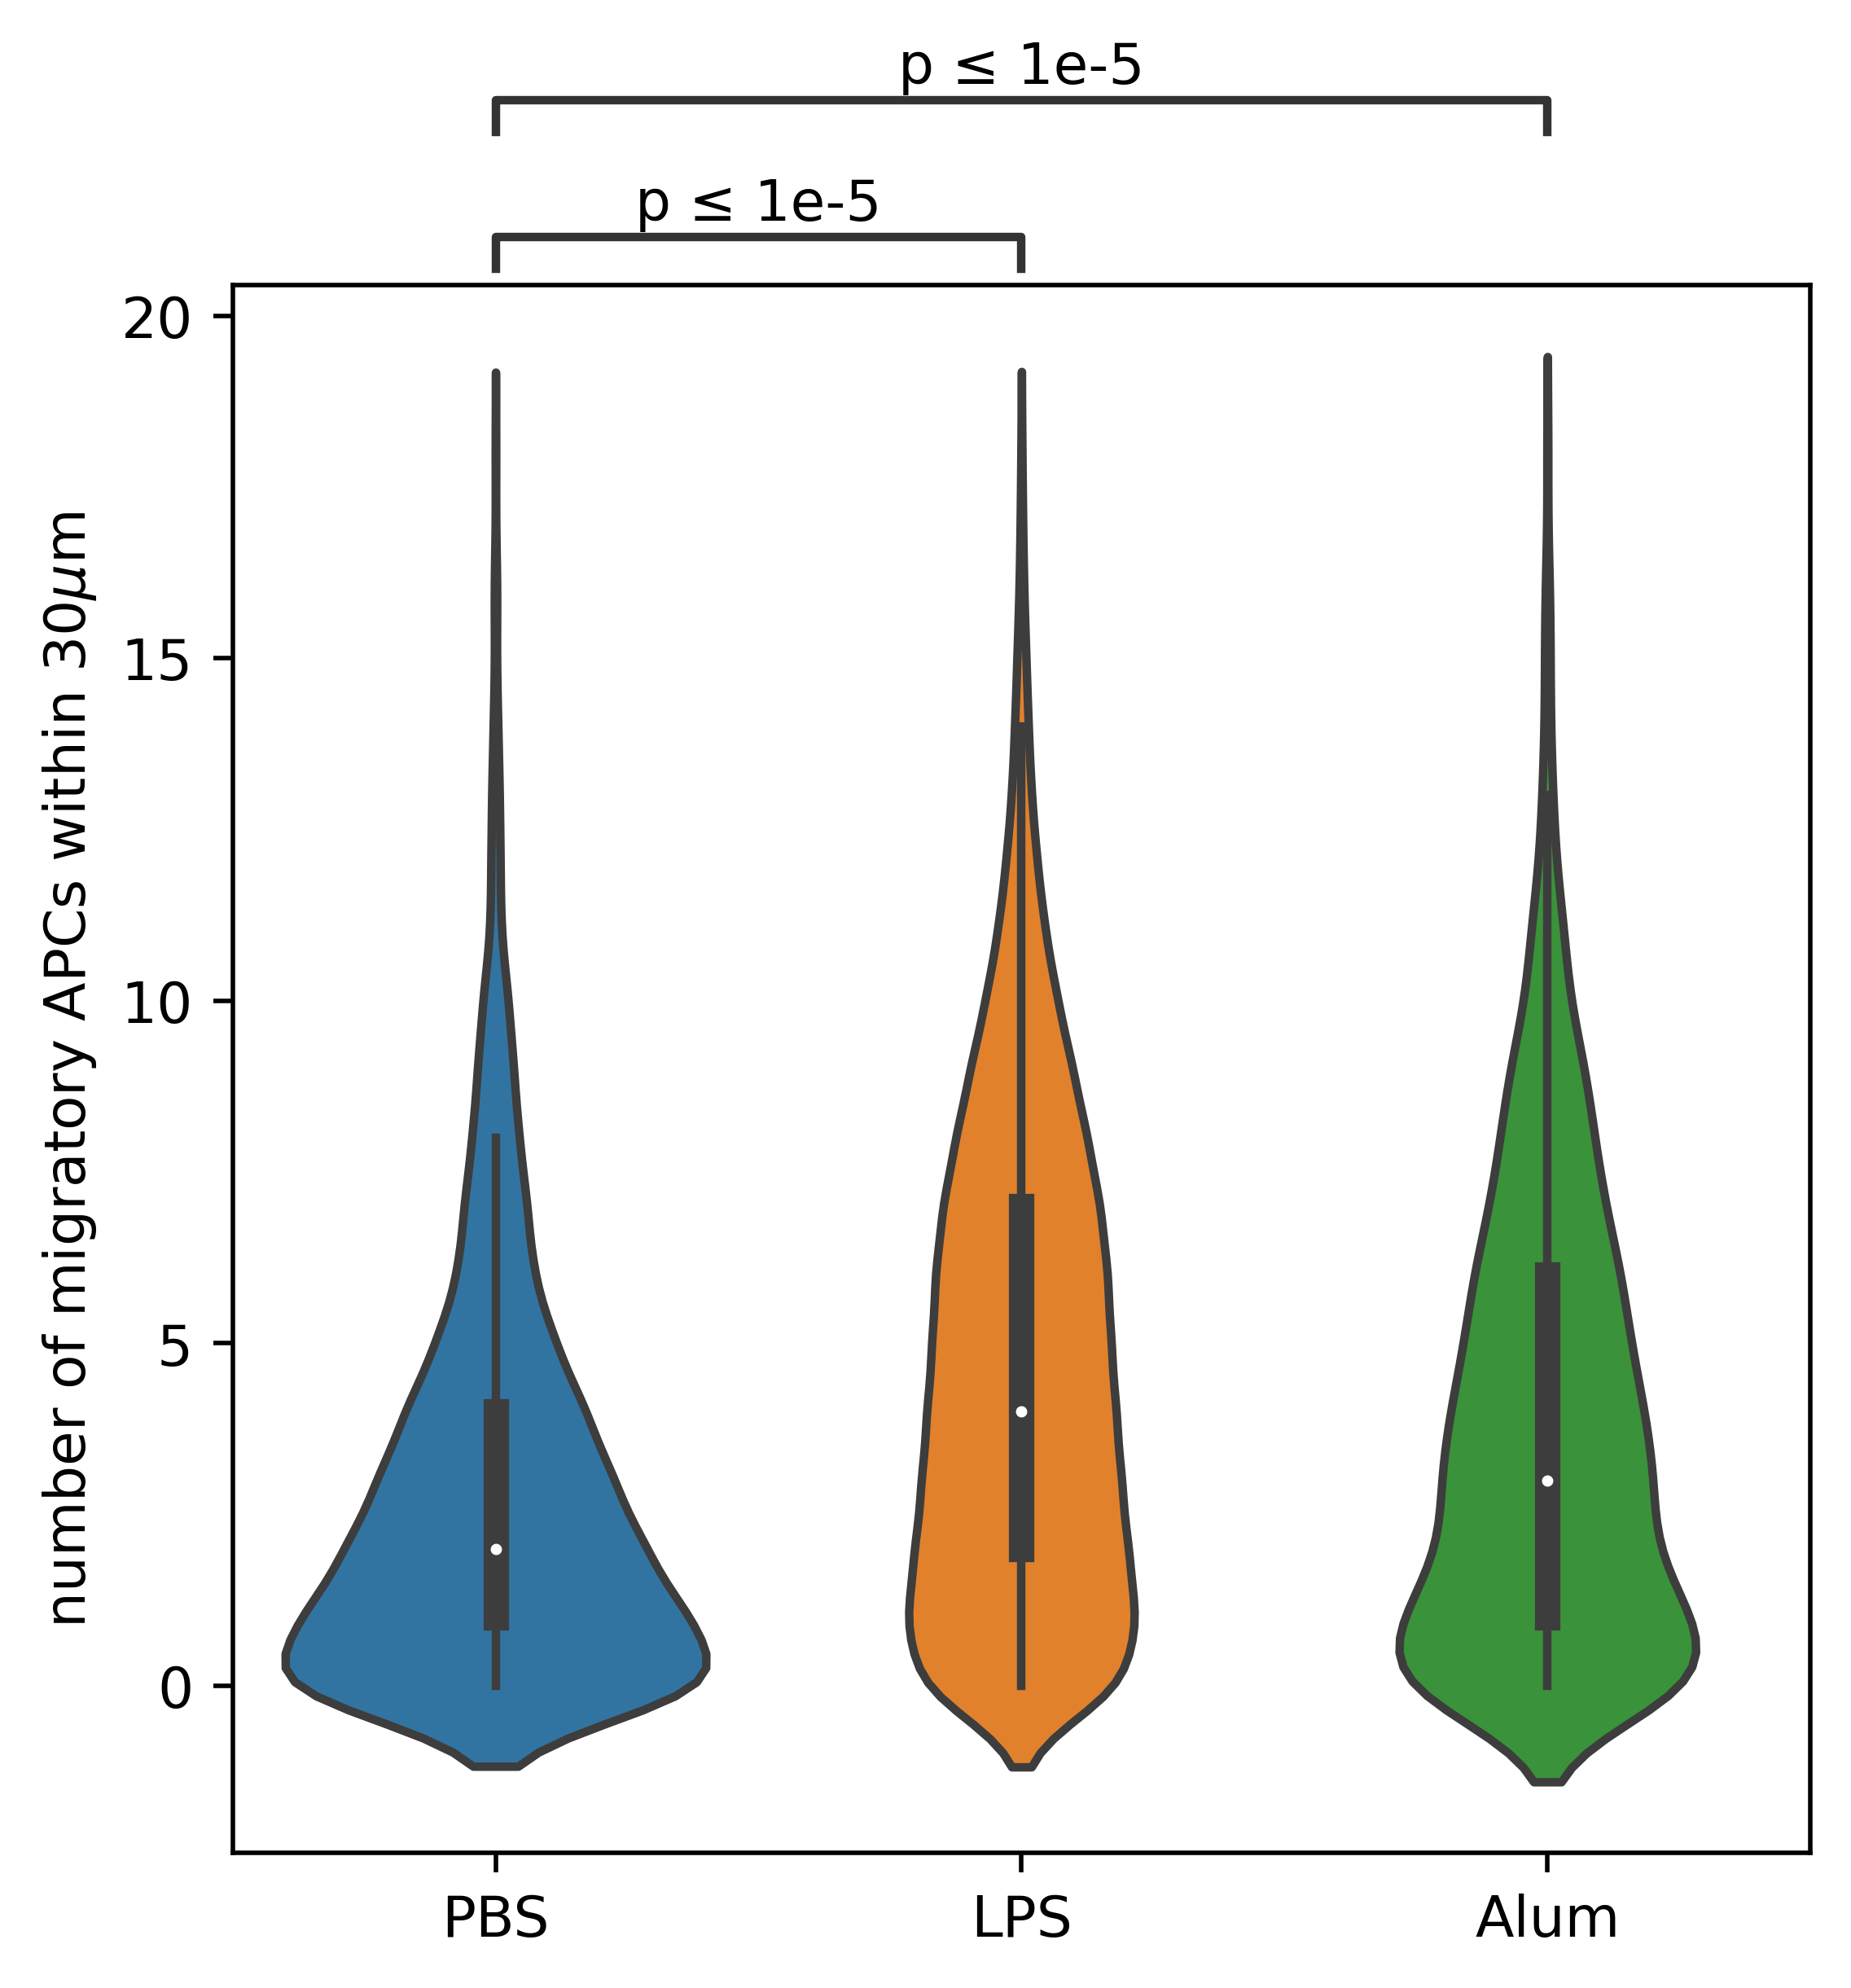

In [68]:
ax=sns.violinplot(data=apc_df, x='condition',y='n_proximal_apcs')
# sns.stripplot(data=apc_df,x='condition',y='n_proximal_apcs',jitter=True,color='black',s=1)
test_results = statannot.add_stat_annotation(ax, data=apc_df, x='condition', y='n_proximal_apcs',
                                    box_pairs=[('PBS','LPS'),('PBS','Alum')],
                                   test='Mann-Whitney', text_format='simple',
                                   loc='outside', verbose=2)
ax.set(xlabel='',ylabel='number of migratory APCs within 30$\mu$m')

In [9]:
samples=['1L','1R','2L','2R']
for sample in samples:
    apc_df=read_stats(f'..\\240515_APC_alum_counts\\{sample}_Statistics')
    print(sample,len(apc_df))

1L 556
1R 776
2L 784
2R 1609


<AxesSubplot:xlabel='n_proximal_apcs', ylabel='Count'>

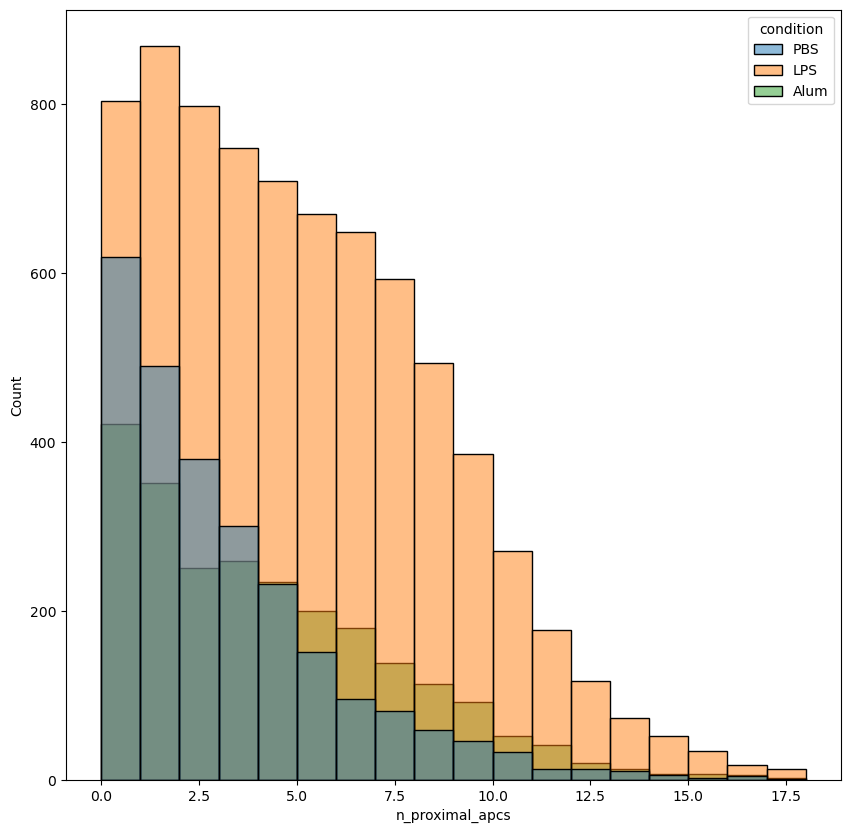

In [77]:
sns.histplot(data=apc_df,x='n_proximal_apcs',hue='condition',binwidth=1)

In [77]:
counts_df=pd.read_csv('..\\240222_ccr7ko\\dc_counts - Copy.csv')

wt_pbs v.s. wt_LPS: t-test independent samples with Bonferroni correction, P_val=4.471e-04 stat=-2.450e+01
ccr7-_pbs v.s. wt_pbs: t-test independent samples with Bonferroni correction, P_val=6.404e-02 stat=-4.432e+00
wt_pbs v.s. wt_alum: t-test independent samples with Bonferroni correction, P_val=7.869e-01 stat=-1.377e+00


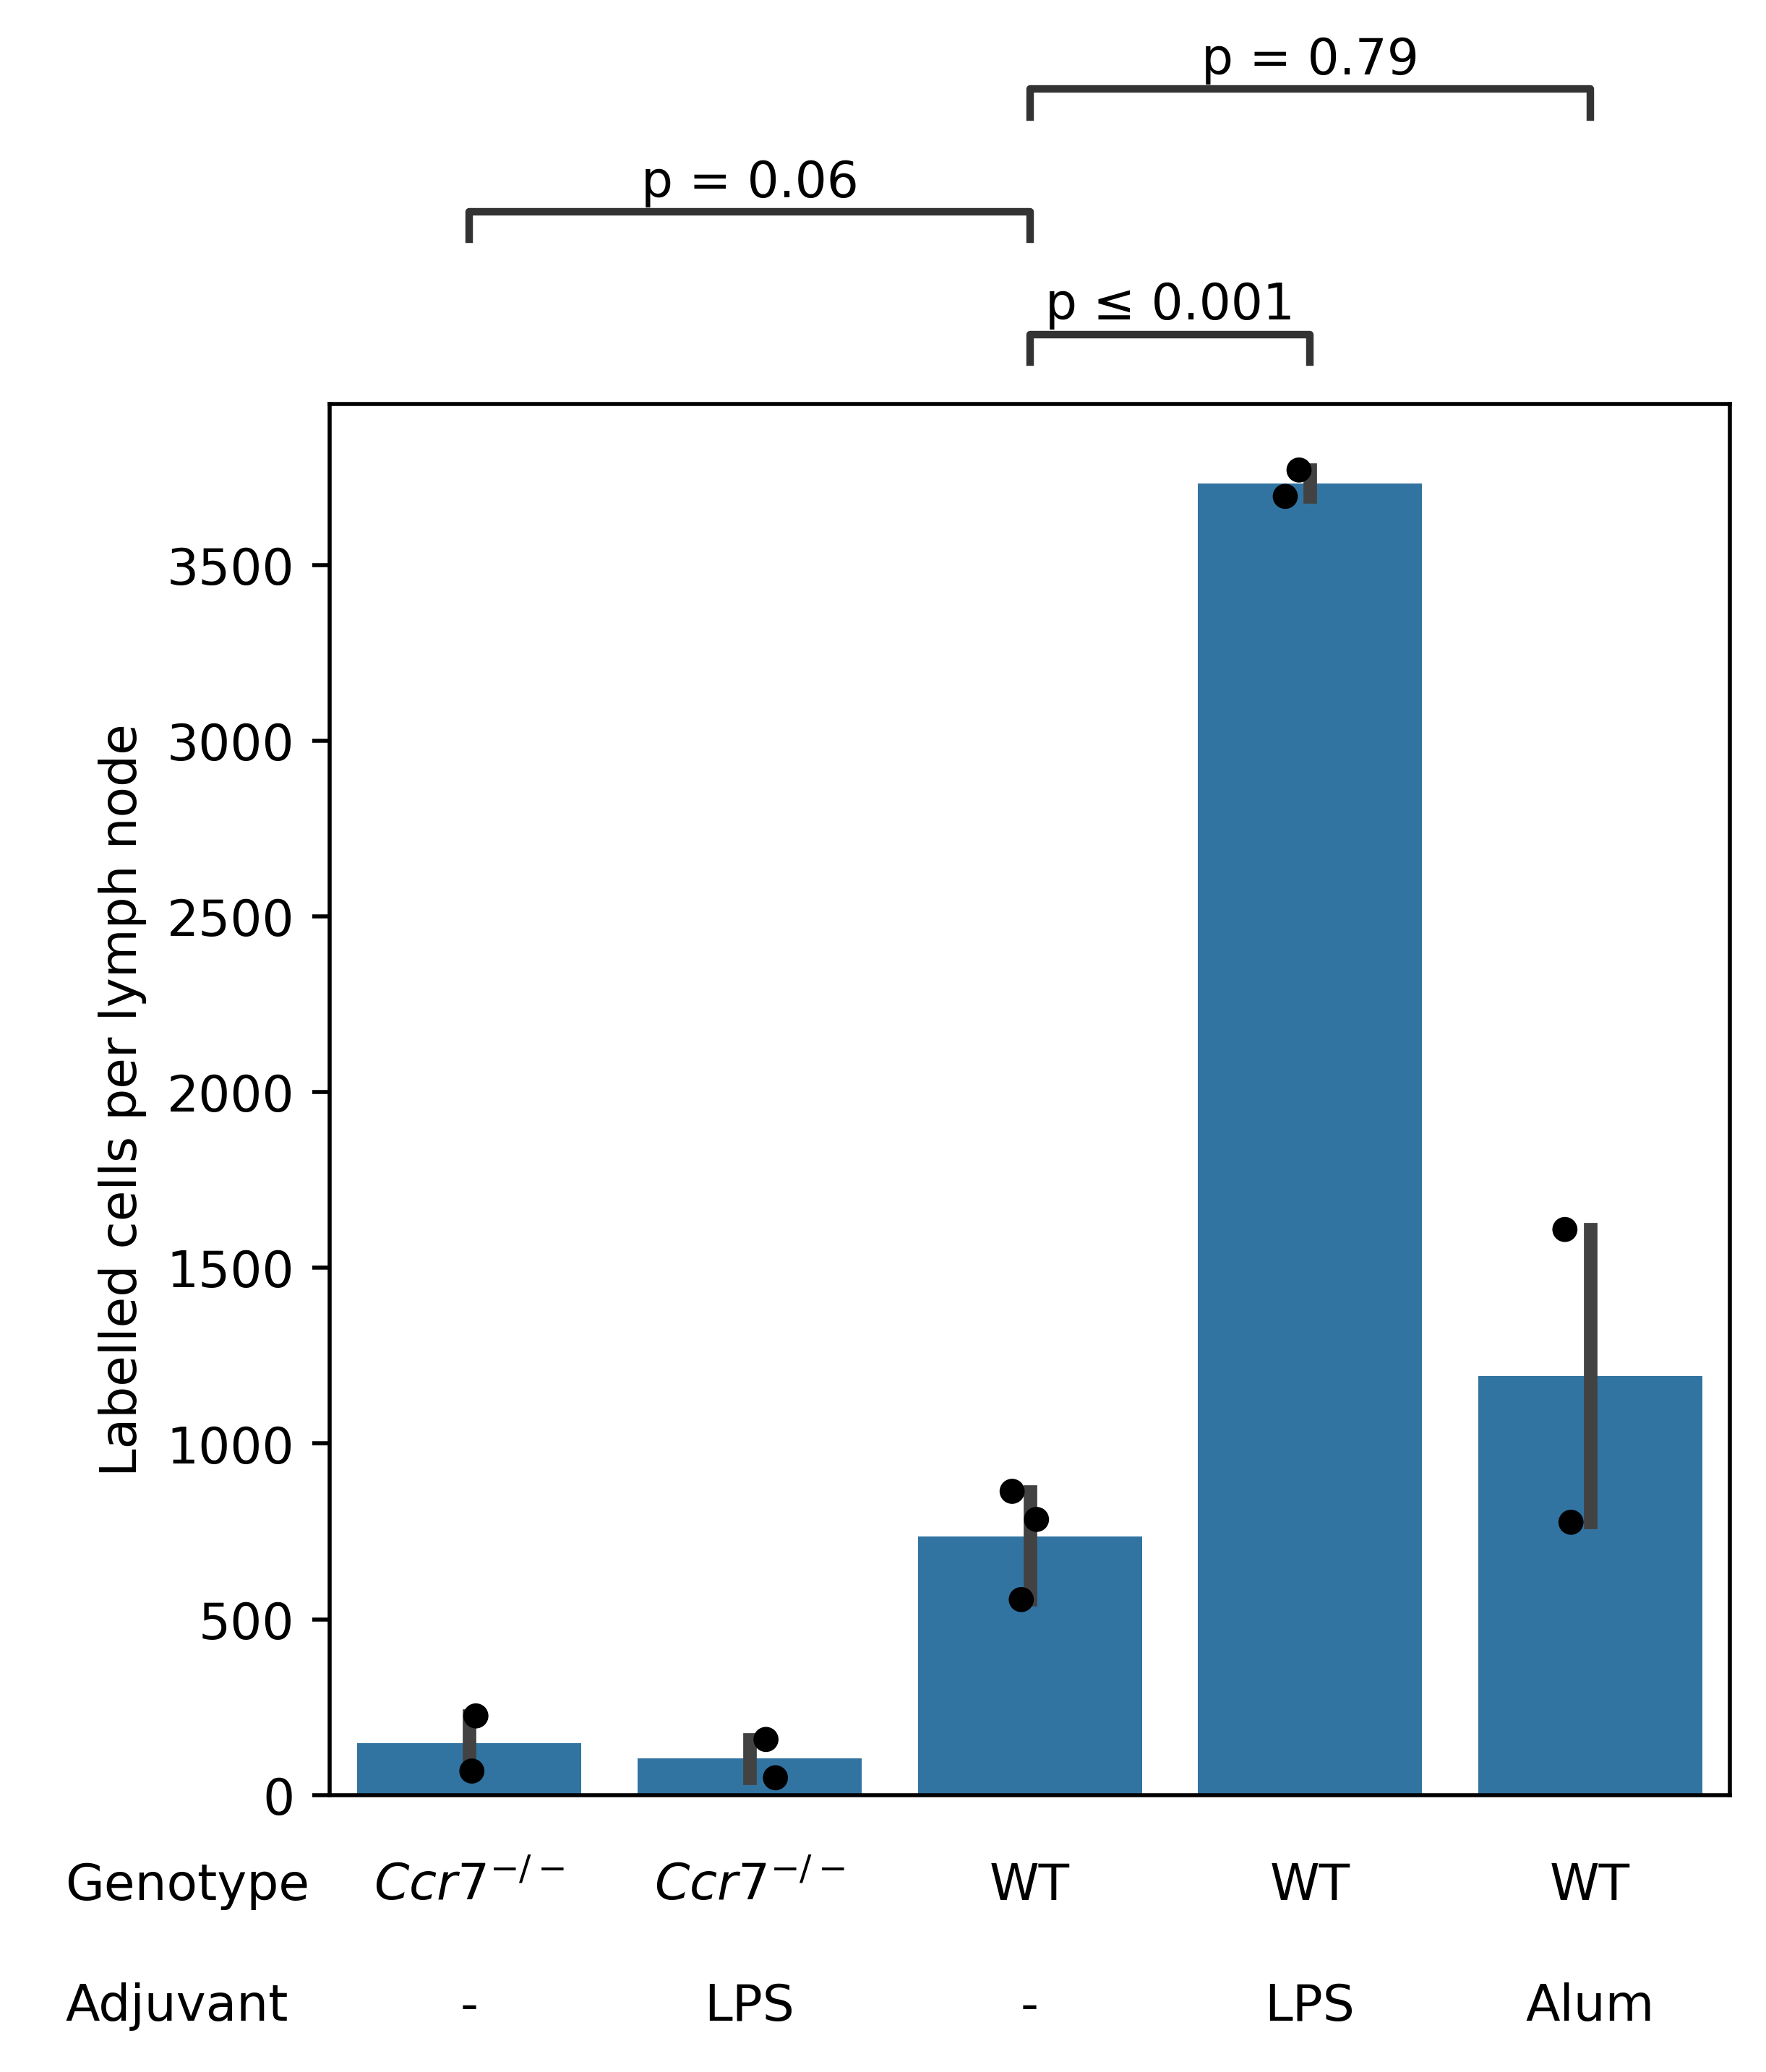

In [71]:
order=['ccr7-_pbs','ccr7-_LPS','wt_pbs','wt_LPS','wt_alum']
ax=sns.barplot(data=counts_df,x='condition',y='count',order=order,color='C0')
sns.stripplot(data=counts_df,x='condition',y='count',order=order,jitter=True,color='black',s=5)
plt.xlabel('')
plt.xticks([])
plt.table(cellText=[['']*5,['$Ccr7^{-/-}$']*2+['WT']*3,['']*5,['-','LPS','-','LPS','Alum']],
                      rowLabels=['','Genotype','','Adjuvant'],cellLoc='center',
                      loc='bottom',
                      edges='open')
plt.ylabel('Labelled cells per lymph node')
test_results = statannot.add_stat_annotation(ax, data=counts_df, x='condition', y='count',order=order,
                                    box_pairs=[('ccr7-_pbs','wt_pbs'),('wt_pbs','wt_alum'),('wt_pbs','wt_LPS')],
                                   test='t-test_ind', text_format='simple',
                                   loc='outside', verbose=2)

wt_pbs v.s. wt_LPS: t-test independent samples with Bonferroni correction, P_val=1.414e-04 stat=-1.697e+01
wt_pbs v.s. wt_alum: t-test independent samples with Bonferroni correction, P_val=2.965e-01 stat=-1.788e+00


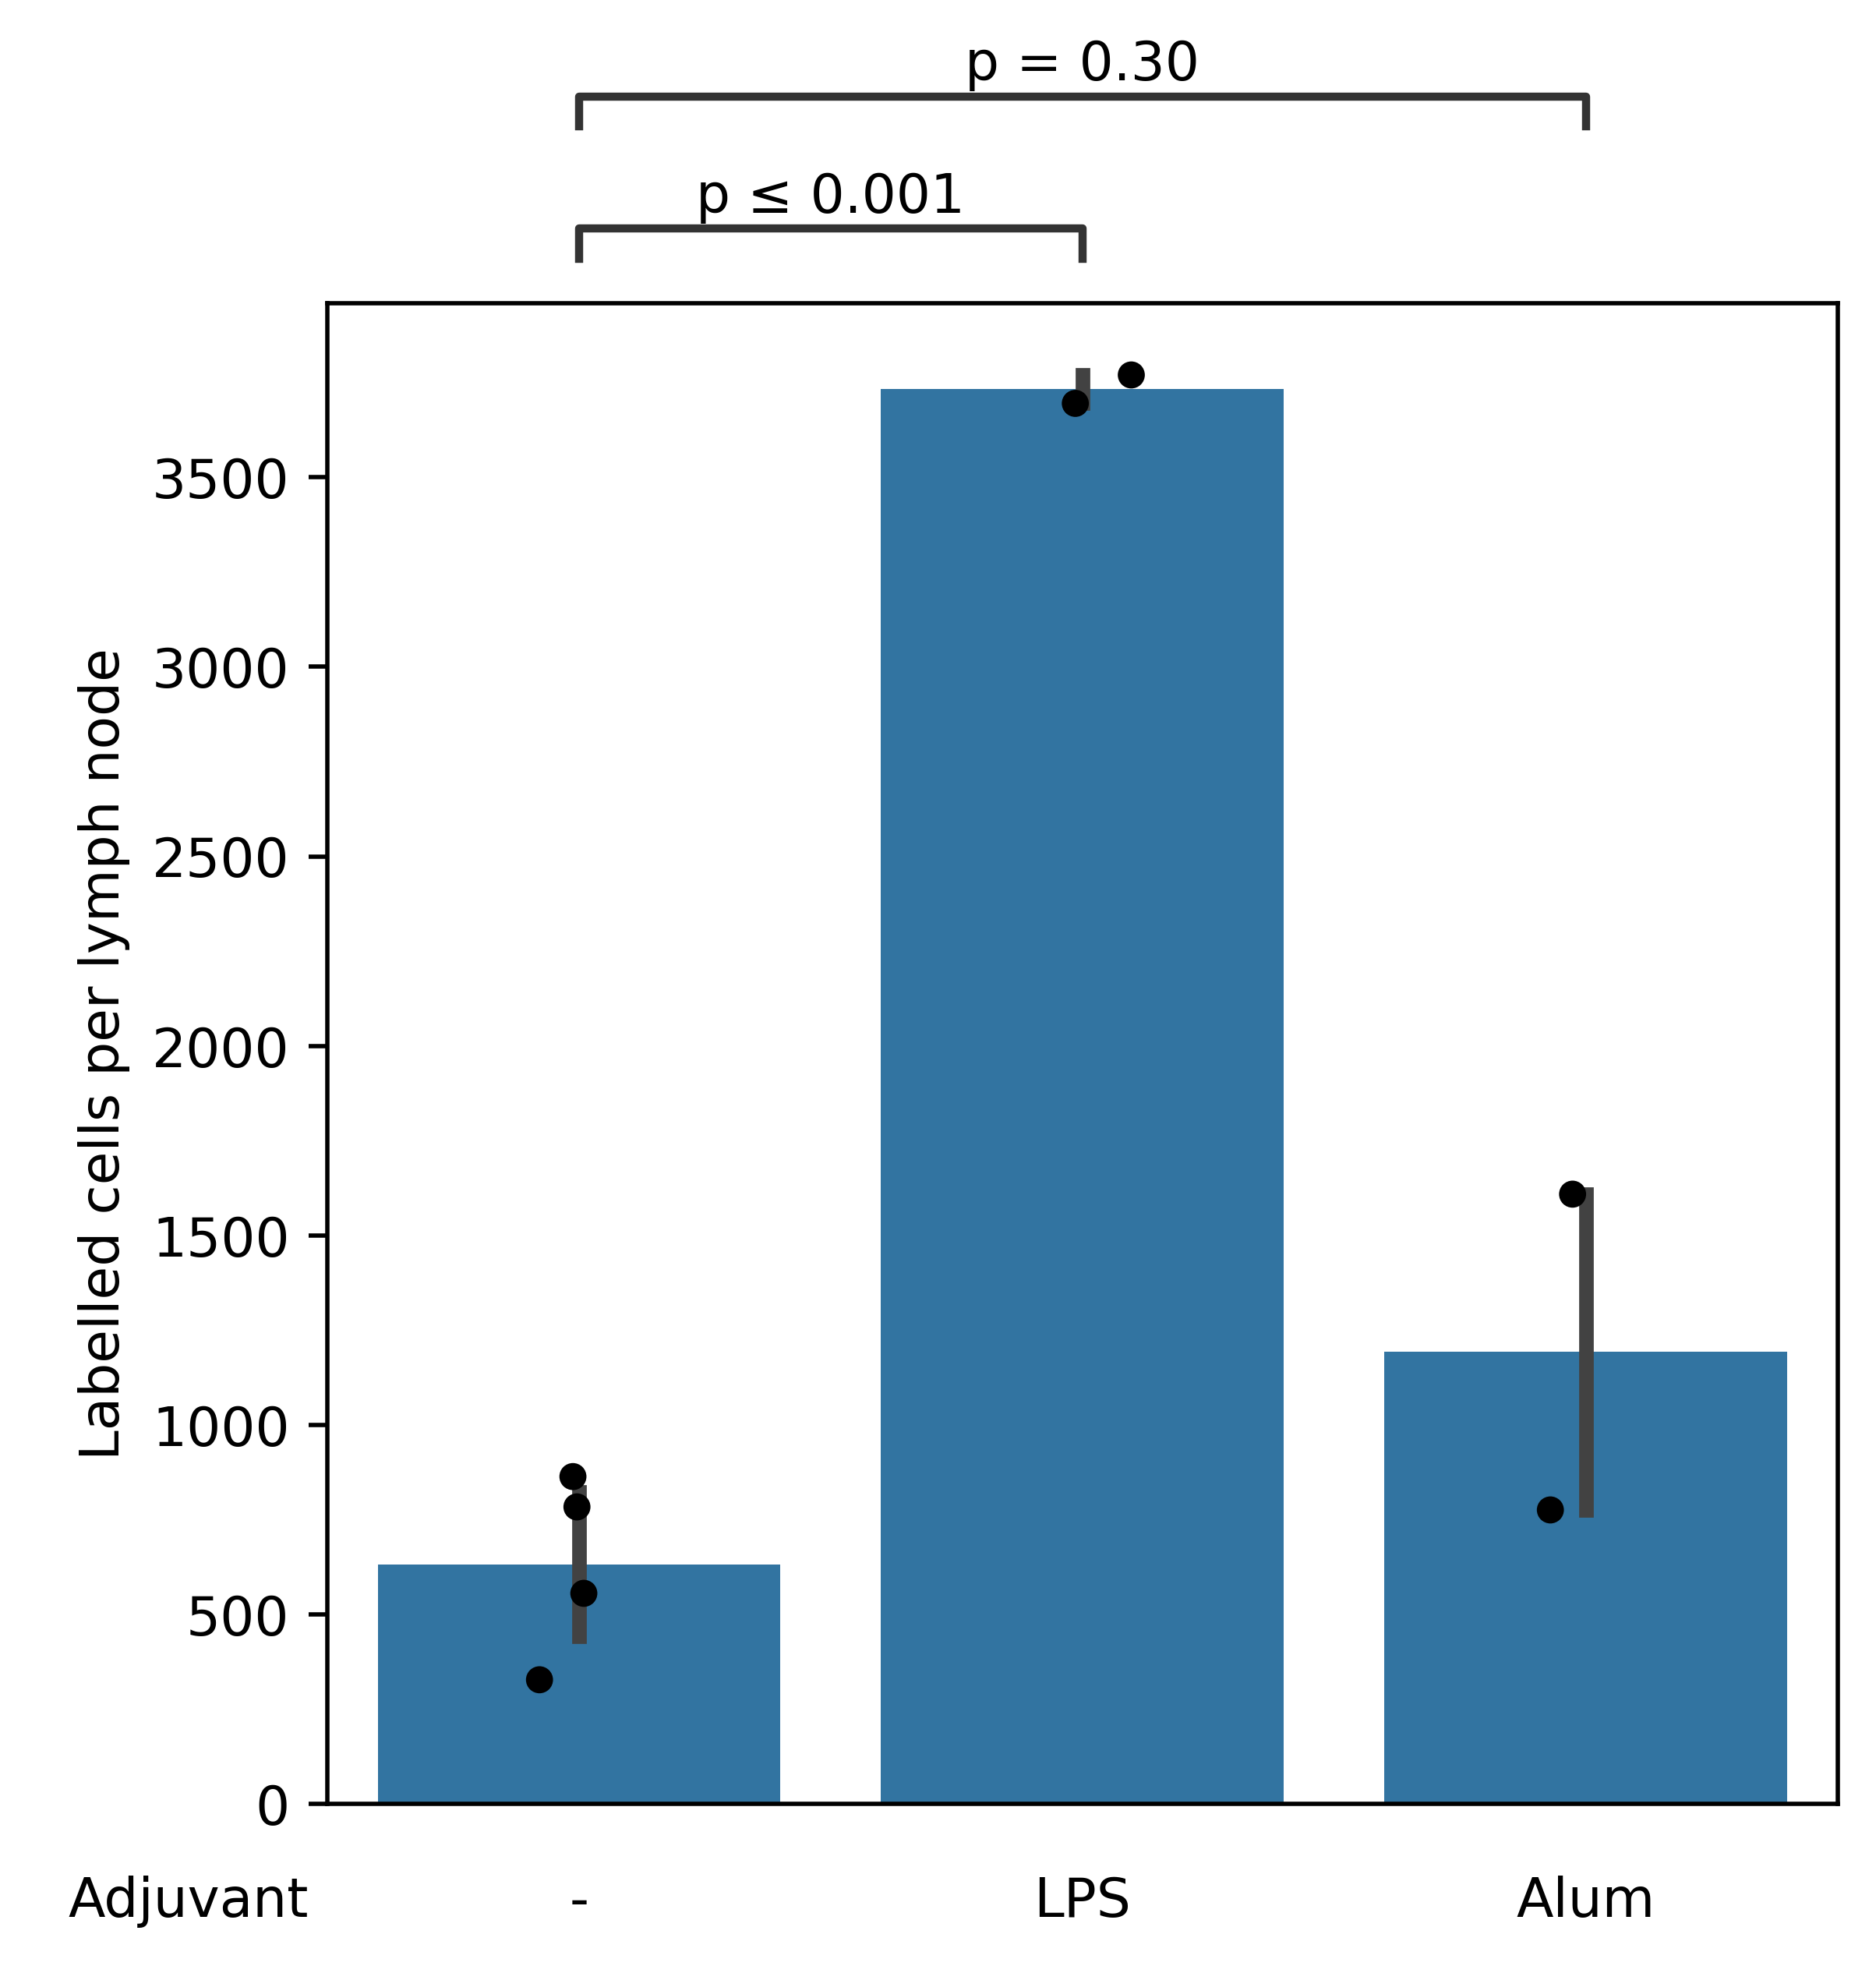

In [78]:
order=['wt_pbs','wt_LPS','wt_alum']
ax=sns.barplot(data=counts_df,x='condition',y='count',order=order,color='C0')
sns.stripplot(data=counts_df,x='condition',y='count',order=order,jitter=True,color='black',s=5)
plt.xlabel('')
plt.xticks([])
plt.table(cellText=[['']*3,['-','LPS','Alum']],
                      rowLabels=['','Adjuvant'],cellLoc='center',
                      loc='bottom',
                      edges='open')
plt.ylabel('Labelled cells per lymph node')
test_results = statannot.add_stat_annotation(ax, data=counts_df, x='condition', y='count',order=order,
                                    box_pairs=[('wt_pbs','wt_alum'),('wt_pbs','wt_LPS')],
                                   test='t-test_ind', text_format='simple',
                                   loc='outside', verbose=2)

In [13]:
for i,grp in enumerate(counts_df.groupby('condition')):
    print(grp[1])

  sample  count  condition
5     3R     49  ccr7-_LPS
7     4R    158  ccr7-_LPS
  sample  count  condition
4     3L    225  ccr7-_pbs
6     4L     68  ccr7-_pbs
  sample  count condition
1     1R   3695    wt_LPS
3     2R   3770    wt_LPS
   sample  count condition
10    1R*    776   wt_alum
11    2R*   1609   wt_alum
  sample  count condition
0     1L    864    wt_pbs
2     2L    328    wt_pbs
8    1L*    556    wt_pbs
9    2L*    784    wt_pbs


Text(0.5, 1.0, '24h after injection')

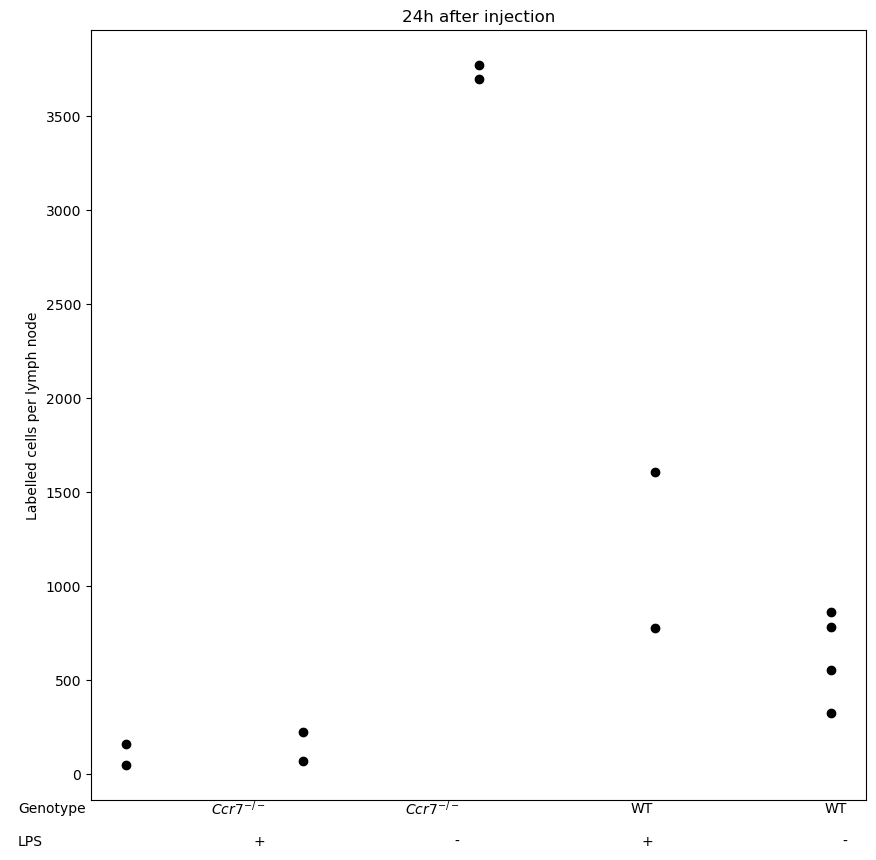

In [14]:
for i,grp in enumerate(counts_df.groupby('condition')):
    plt.scatter([i]*len(grp[1]),grp[1]['count'],c='black')
conditions=counts_df['condition'].unique()
# plt.xticks(range(len(groupby)),groupby.groups.keys())
plt.xticks([])
plt.table(cellText=[['$Ccr7^{-/-}$']*2+['WT']*2,['']*4,['+','-']*2],
                      rowLabels=['Genotype','','LPS'],
                      loc='bottom',
                      edges='open')
plt.ylabel('Labelled cells per lymph node')
plt.title('24h after injection')